# Visuals of non-text data
This allows us to see how word vectors are influenced by authors and year of writing.

This visuals aren't just important to get a better historical understanding of of the authors, the eras of writing, the length of publications, but it also gives us insight into how our tokenized models will model. If, for example, in one era of interest, there's only one or two authors, they will have a heavy influence.

In [1]:
from bidi import algorithm as bidialg
import matplotlib.pyplot as plt
import arabic_reshaper
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import json
import re

%matplotlib inline

In [2]:
with open('../../assets/all_books.pkl', 'rb') as f:
    all_books = pickle.load(f)

df = pd.DataFrame(all_books)

## Let's look at some graphs comparing the different schools

In [3]:
categories = [134,135,136,137]

current_palette = sns.color_palette()

category_graphs = {
    134: ['Ḥanafī', current_palette[0]],
    135: ['Mālikī', current_palette[1]],
    136: ['Shāfiʿī', current_palette[2]],
    137: ['Ḥanbalī', current_palette[3]],
}

In [4]:
# this allows for plots and distributions by century, since not every author/book occured at equal time spans.
# and visualizing this over 100 year spans makes more sense.
def centuryFromYear(year):
    return ((year) // 100)*100

df['century'] = df['author_dd'].apply(centuryFromYear)

### What's the overall distribution of authorship based on school over the past 14 centuries?

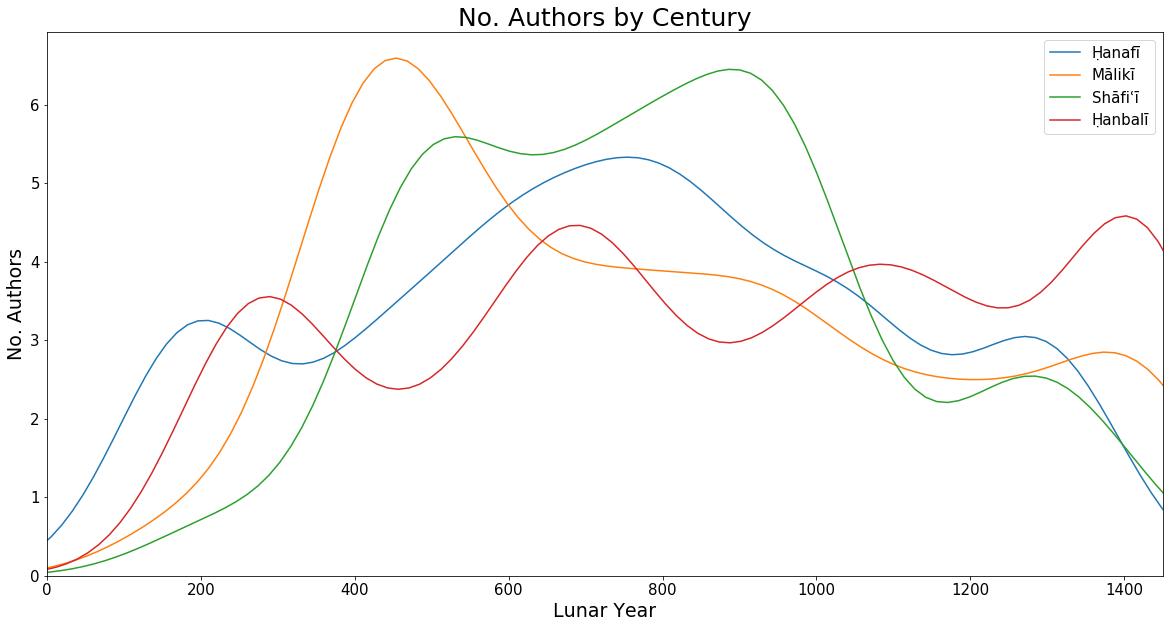

In [5]:
f,ax = plt.subplots(figsize=(20,10))

for category_id in categories:
    sns.kdeplot(df[df['category_id'] == category_id]['author_dd'], bw=95, label=category_graphs[category_id][0],
                ax=ax,color=category_graphs[category_id][1]);

ax.set(xlim=(0, 1450));
ax.set_yticklabels(np.arange(0,7),fontsize=15)
ax.legend(fontsize=15)
ax.set_title("No. Authors by Century", fontsize=25);
ax.set_ylabel("No. Authors", fontsize=19);
ax.set_xlabel("Lunar Year", fontsize=19);
ax.set_xticklabels(np.arange(0,1500,200),fontsize=15);

### Although there are many more books from the `Ḥanbalī` group nearing almost `80`, while the `Ḥanafī` group only has close to `50` texts from this data source, the overall distribution is still fairly even throughout the centuries.

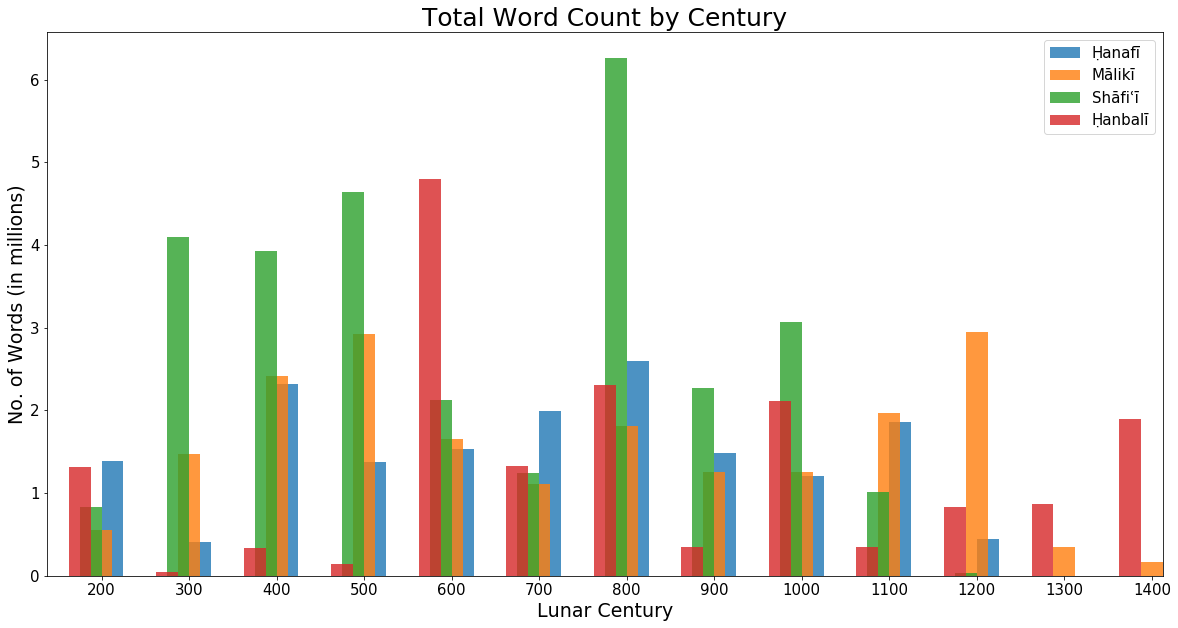

In [6]:
f,ax = plt.subplots(figsize=(20,10))
df[df['category_id'] == 134].groupby('century')['num_words'].sum().plot(kind='bar',stacked=True,width=0.25, position=0.0,ax=ax,label='Ḥanafī',color=current_palette[0],alpha=.8);
df[df['category_id'] == 135].groupby('century')['num_words'].sum().plot(kind='bar',stacked=True,width=0.25, position=0.5,ax=ax,label='Mālikī',color=current_palette[1],alpha=.8);
df[df['category_id'] == 136].groupby('century')['num_words'].sum().plot(kind='bar',stacked=True,width=0.25, position=1.0,ax=ax,label='Shāfiʿī',color=current_palette[2],alpha=.8);
df[df['category_id'] == 137].groupby('century')['num_words'].sum().plot(kind='bar',stacked=True,width=0.25, position=1.5,ax=ax,label='Ḥanbalī',color=current_palette[3],alpha=.8);

ax.legend(fontsize=15)
ax.set_xlabel("Lunar Century", fontsize=19);
ax.set_yticklabels(np.arange(0,7,1),fontsize=15)
ax.set_title("Total Word Count by Century", fontsize=25);
ax.set_ylabel("No. of Words (in millions)", fontsize=19);
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15, rotation=360);

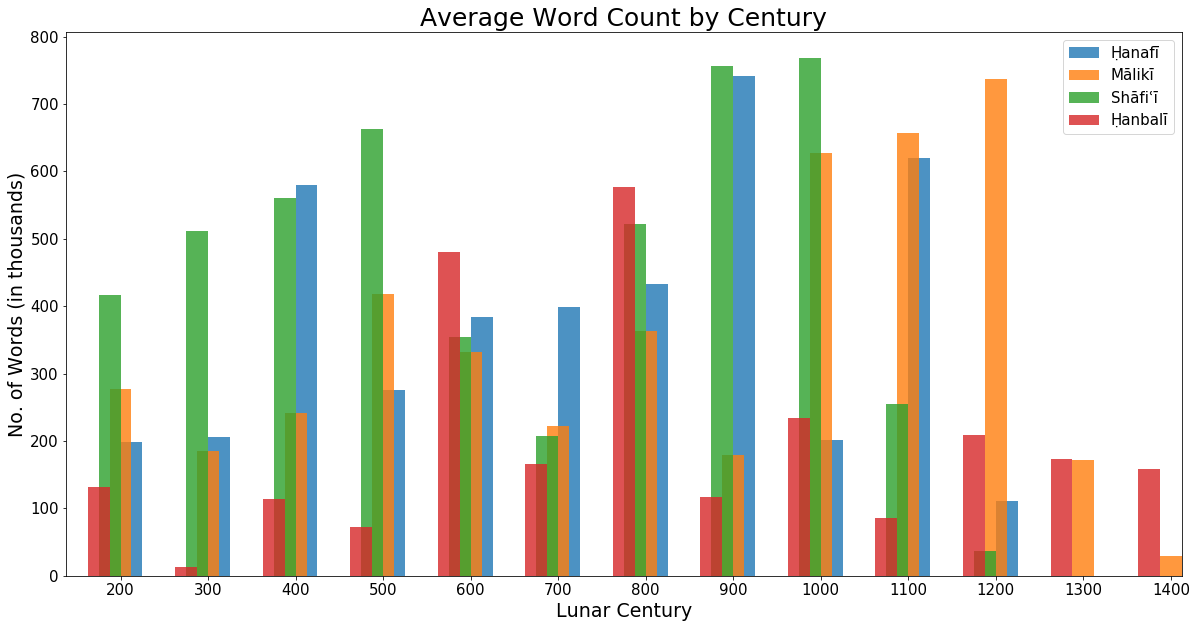

In [7]:
f,ax = plt.subplots(figsize=(20,10))
df[df['category_id'] == 134].groupby('century')['num_words'].mean().plot(kind='bar',stacked=True,width=0.25, position=0.0,ax=ax,label='Ḥanafī',color=current_palette[0],alpha=.8);
df[df['category_id'] == 135].groupby('century')['num_words'].mean().plot(kind='bar',stacked=True,width=0.25, position=0.5,ax=ax,label='Mālikī',color=current_palette[1],alpha=.8);
df[df['category_id'] == 136].groupby('century')['num_words'].mean().plot(kind='bar',stacked=True,width=0.25, position=1.0,ax=ax,label='Shāfiʿī',color=current_palette[2],alpha=.8);
df[df['category_id'] == 137].groupby('century')['num_words'].mean().plot(kind='bar',stacked=True,width=0.25, position=1.5,ax=ax,label='Ḥanbalī',color=current_palette[3],alpha=.8);

ax.legend(fontsize=15)
ax.set_xlabel("Lunar Century", fontsize=19);
ax.set_yticklabels(np.arange(0,900,100),fontsize=15)
ax.set_title("Average Word Count by Century", fontsize=25);
ax.set_ylabel("No. of Words (in thousands)", fontsize=19);
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15, rotation=360);

### We see here that per century, the `Shāfiʿī` and `Ḥanbalī` schools tends to write much larger texts.

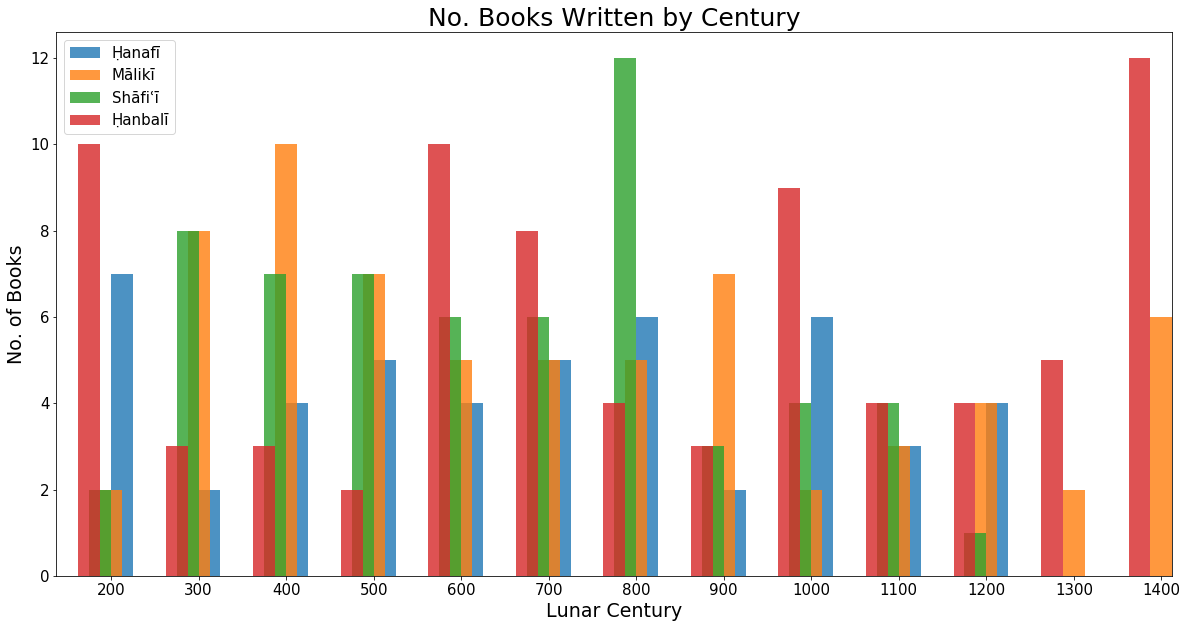

In [8]:
f,ax = plt.subplots(figsize=(20,10))

df[df['category_id'] == 134].groupby('century')['book_id'].count().plot(kind='bar',stacked=True,width=0.25, position=0.0,ax=ax,label='Ḥanafī',color=current_palette[0],alpha=.8);
df[df['category_id'] == 135].groupby('century')['book_id'].count().plot(kind='bar',stacked=True,width=0.25, position=0.5,ax=ax,label='Mālikī',color=current_palette[1],alpha=.8);
df[df['category_id'] == 136].groupby('century')['book_id'].count().plot(kind='bar',stacked=True,width=0.25, position=1.0,ax=ax,label='Shāfiʿī',color=current_palette[2],alpha=.8);
df[df['category_id'] == 137].groupby('century')['book_id'].count().plot(kind='bar',stacked=True,width=0.25, position=1.5,ax=ax,label='Ḥanbalī',color=current_palette[3],alpha=.8);

ax.legend(fontsize=15);
ax.set_xlabel("Lunar Century", fontsize=19);
ax.set_yticklabels(np.arange(0,14,2),fontsize=15)
ax.set_title("No. Books Written by Century", fontsize=25);
ax.set_ylabel("No. of Books", fontsize=19);
ax.set_xticklabels(ax.get_xticklabels(),fontsize=15, rotation=360);

### They tend to write longer books, but at the same time, they write more books as well.
*Again, this is slightly skewed by the fact that book counts range from 48 up to 77.*

Ḥanafī Authors: ['محمد بن الحسن الشيباني'].
Mālikī Authors: ['ابن أبي زيد القيرواني', 'ابن رشد الجد', 'محمد باي بلعالم', 'القاضي عبد الوهاب'].
Shāfiʿī Authors: ['الأنصاري، زكريا', 'النووي'].
Ḥanbalī Authors: ['محمد بن عبد الوهاب', 'الكرماني، حرب بن إسماعيل', 'أحمد بن حنبل', 'ابن تيمية', 'البهوتي', 'موفق الدين ابن قدامة'].


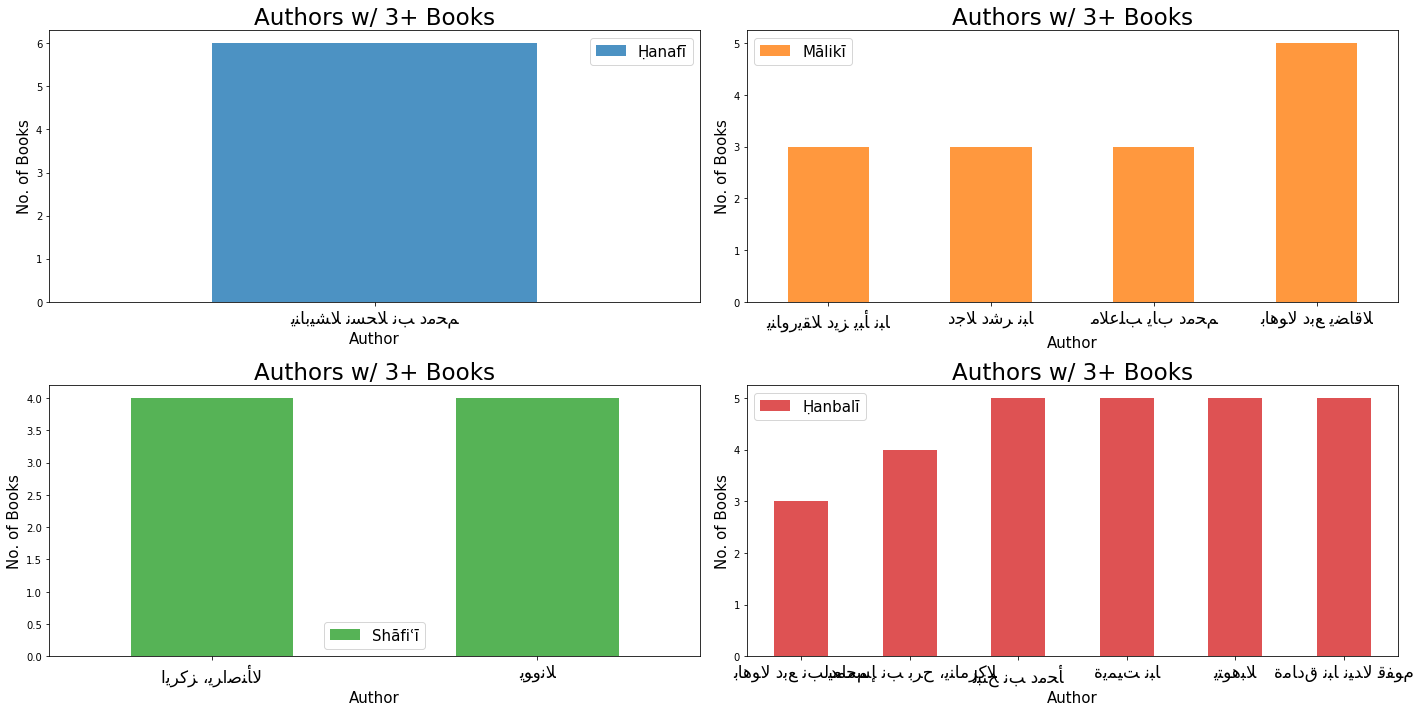

In [9]:
f,axes = plt.subplots(2,2,figsize=(20,10))

for ax,category_id in zip (axes.flatten(),[134,135,136,137]):
    df[df['category_id'] == category_id].groupby('author_name')['book_id'].count().loc[lambda x: x > 2].sort_values().plot(kind='bar',ax=ax,label=category_graphs[category_id][0],color=category_graphs[category_id][1],alpha=.8);
    print('{} Authors: {}.'.format(category_graphs[category_id][0],[l.get_text() for l in ax.get_xticklabels()]))
    
    ax.legend(fontsize=15);
    ax.set_xlabel("Author", fontsize=15);
    ax.set_title("Authors w/ 3+ Books", fontsize=23);
    ax.set_ylabel("No. of Books", fontsize=15);
    ax.set_xticklabels([arabic_reshaper.reshape(bidialg.get_display(l.get_text())) for l in ax.get_xticklabels()],
                       fontsize=17, rotation=360);

plt.tight_layout()

### Lastly, we can see how many authors wrote 3 or more books. This will give us an idea of key words and phrases, and how these authors — having written the majority of all works within the school — personally shaped those results. But also that their own works will probably be high recommendations for each other.

This point is extremely obvious when we look at the one `Ḥanafī` author *Muḥammad ibn al-Ḥasan al-Shaybānī* who authored 6 books before 189. It's important to note that he was **the main** codifier of the school, and makes up nearly the entire corpus of works of that era. His works, methodology, and legacy will first and foremost shape that era, but also the eras to come, since later `Ḥanafī` texts are all based on his works.